In [1]:
println("Hello Simplified Graph Convolutional Neural Nets on Community Structures!")

Hello Simplified Graph Convolutional Neural Nets on Community Structures!


In [2]:
using LinearAlgebra, Plots, LightGraphs, DelimitedFiles # GraphPlot
#using RCall

In [3]:
# GOAL OF RESEARCH
#prove kalashnikov was right by quoting him! 'what is simple is useful, what is complicated is useless'

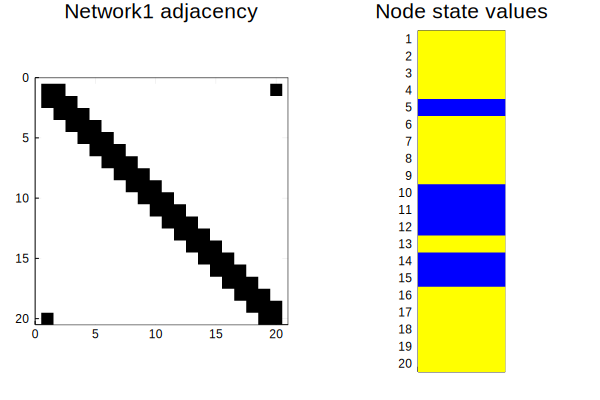

In [87]:
#Network 1
#Ring network of 40 nodes

#make the adjacency for the ring network
NN1 = 20

AdjNN1 = zeros(NN1,NN1)
for ii in 1:size(AdjNN1)[1]
    for jj in 1:size(AdjNN1)[2]            
        if(ii == (jj+1))
            AdjNN1[ii,jj] = 1
        elseif(ii == (jj-1))
            AdjNN1[ii,jj] = 1
        end        
    end
end
AdjNN1[1,NN1] = 1
AdjNN1[NN1,1] = 1

#make the diagonal for the adj matrix
diag1 = Diagonal(AdjNN1)
diag1 .+= 1
#add self-loops as the paper describes
AdjNN1 .+= diag1
#=
hAdjNN1 = heatmap(AdjNN1,title="Network1 adjacency",
    showaxis=true,xticks=true,yticks=true,yaxis=:flip,aspect_ratio=1.0,
    framestyle=:box,xlims=(0.5,NN1+0.5),legend=nothing,
    c=ColorGradient([:white,:black]))
=#
hAdjNN1 = heatmap(AdjNN1,title="Network1 adjacency",
    showaxis=true,yaxis=:flip,aspect_ratio=1.0,
    framestyle=:box,xlims=(0.0,NN1+1.0),legend=nothing,ylims=(0.0,NN1+0.5),
    yticks=0:5:NN1,xticks=0:5:NN1,
    c=ColorGradient([:white,:black]))

#display(hAdjNN1);
#node attributes (variables)
varX = ones(NN1,1)
[varX[i] = -1 for i in [5,10,11,12,14,15]]
varX = repeat(varX,outer=(1,6))
hVarX = heatmap(varX,title="Node state values",
    yaxis=:flip,aspect_ratio=1.0,
    framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
    yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
    c=ColorGradient([:blue,:yellow]))
p=plot(hAdjNN1,hVarX,layout=2)
display(p)
savefig(p,"sample.png")

In [90]:
#define associated vector of attributes for each node that can be eg [burger, pizza]
#define the identity of each node as training data



In [93]:
#AdjNN1
#str *= "{node [style=filled,color=yellow] a b   d3  } "
#str *= "{node [style=filled,color=skyblue] c A2  } "

strNN1=""
#init
strNN1 *= "strict digraph graphname { concentrate=true node [style=filled] "


#node
for ii in 1:size(AdjNN1)[1]
    if(varX[ii] == 1)
        strNN1 *= "{node [style=filled,color=yellow]"
        strNN1 *= " N$(ii) }"   
    else
        strNN1 *= "{node [style=filled,color=skyblue]"
        strNN1 *= " N$(ii) }"   
    end
end
#=strNN1 *= "{node [style=filled,color=yellow]" 
for ii in 1:size(AdjNN1)[1]
        strNN1 *= " N$(ii) "  
end=#


#strNN1 *= "} " #str *= "{node [style=filled,color=skyblue] c A2  } "

#edges
for ii in 1:size(AdjNN1)[1]
    for jj in 1:size(AdjNN1)[2]
        if(AdjNN1[ii,jj] == 1 )
            if(ii != jj)
                strNN1 *= " N$(ii) -> N$(jj) [dir=both];" #str *= " c -- d3 -- A2 -- a; "
            end
        end
    end
end
#tie off
strNN1 *= "}"
println(strNN1)



strict digraph graphname { concentrate=true node [style=filled] {node [style=filled,color=yellow] N1 }{node [style=filled,color=yellow] N2 }{node [style=filled,color=yellow] N3 }{node [style=filled,color=yellow] N4 }{node [style=filled,color=skyblue] N5 }{node [style=filled,color=yellow] N6 }{node [style=filled,color=yellow] N7 }{node [style=filled,color=yellow] N8 }{node [style=filled,color=yellow] N9 }{node [style=filled,color=skyblue] N10 }{node [style=filled,color=skyblue] N11 }{node [style=filled,color=skyblue] N12 }{node [style=filled,color=yellow] N13 }{node [style=filled,color=skyblue] N14 }{node [style=filled,color=skyblue] N15 }{node [style=filled,color=yellow] N16 }{node [style=filled,color=yellow] N17 }{node [style=filled,color=yellow] N18 }{node [style=filled,color=yellow] N19 }{node [style=filled,color=yellow] N20 } N1 -> N2 [dir=both]; N1 -> N20 [dir=both]; N2 -> N1 [dir=both]; N2 -> N3 [dir=both]; N3 -> N2 [dir=both]; N3 -> N4 [dir=both]; N4 -> N3 [dir=both]; N4 -> N5 [

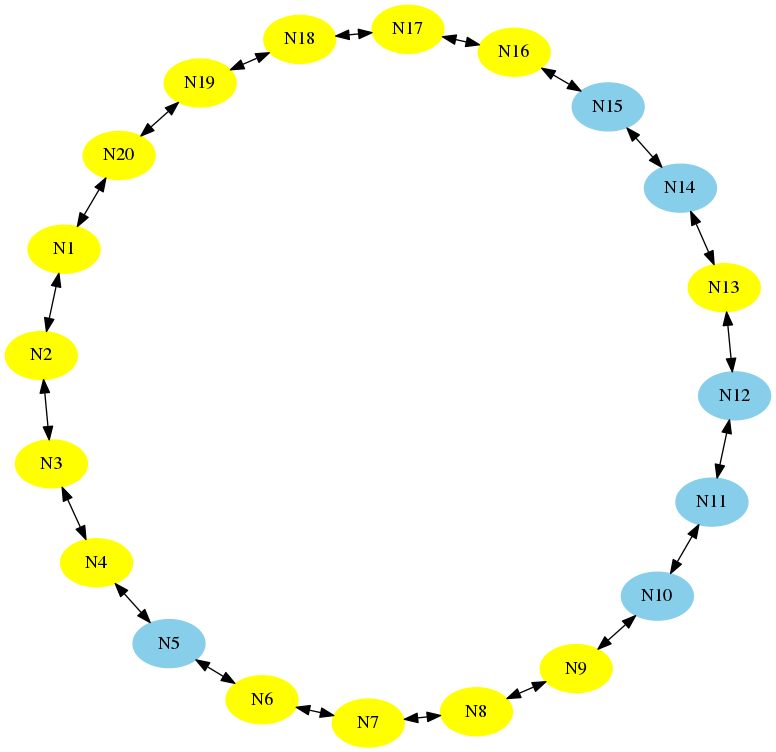

In [94]:
fileNameNN1 = "tmpFileNN1.dot"
filePNGNN1 = "tmpFileNN1.png"
writedlm( string("./",fileNameNN1), [strNN1] ,quotes=false)
run(`neato $fileNameNN1 -Tpng -o $filePNGNN1`)
display("image/png", read(filePNGNN1))

In [ ]:
#algorithmics!


In [95]:



#!!!!!!!!!!VISUALIZATION OF THE MATRIX NETWORK!!!!!!!!!!!!!!
#!!!!!!!!!




#!!!!!!!!!!!!!!

In [13]:
#dataset of synthetic number 2, that is bigger and more complex community associations



In [14]:
#use the Zachary karate club data with preset side splits and infer from the unified set (type of clustering)





In [15]:
#search for a network science dataset that has community labels upon an aggregate of variables





In [16]:
#test on a new dataset that we don't know much about and see if the community labels match the labels we produce





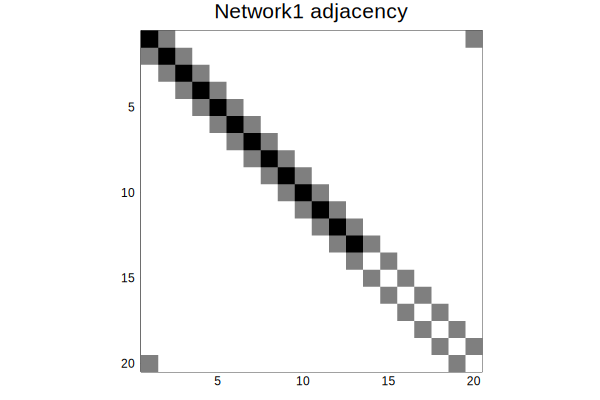


  [1 ,  1]  =  2
  [2 ,  1]  =  1
  [20,  1]  =  1
  [1 ,  2]  =  1
  [2 ,  2]  =  2
  [3 ,  2]  =  1
  [2 ,  3]  =  1
  [3 ,  3]  =  2
  [4 ,  3]  =  1
  [3 ,  4]  =  1
  [4 ,  4]  =  2
  [5 ,  4]  =  1
  [4 ,  5]  =  1
  [5 ,  5]  =  2
  [6 ,  5]  =  1
  [5 ,  6]  =  1
  [6 ,  6]  =  2
  [7 ,  6]  =  1
  [6 ,  7]  =  1
  [7 ,  7]  =  2
  [8 ,  7]  =  1
  [7 ,  8]  =  1
  [8 ,  8]  =  2
  [9 ,  8]  =  1
  [8 ,  9]  =  1
  [9 ,  9]  =  2
  [10,  9]  =  1
  [9 , 10]  =  1
  [10, 10]  =  2
  [11, 10]  =  1
  [10, 11]  =  1
  [11, 11]  =  2
  [12, 11]  =  1
  [11, 12]  =  1
  [12, 12]  =  2
  [13, 12]  =  1
  [12, 13]  =  1
  [13, 13]  =  2
  [14, 13]  =  1
  [13, 14]  =  1
  [15, 14]  =  1
  [14, 15]  =  1
  [16, 15]  =  1
  [15, 16]  =  1
  [17, 16]  =  1
  [16, 17]  =  1
  [18, 17]  =  1
  [17, 18]  =  1
  [19, 18]  =  1
  [18, 19]  =  1
  [20, 19]  =  1
  [1 , 20]  =  1
  [19, 20]  =  1


In [17]:


vLG_NN1 = SimpleGraph(NN1);
for ii in 1:NN1
    for jj in 1:NN1          
        if(ii == (jj+1))
            add_edge!(vLG_NN1,ii,jj)  
        end
        if(ii == jj  && ii<NN1-6)
            add_edge!(vLG_NN1,ii,jj)
        end        
    end
end
add_edge!(vLG_NN1,NN1,1)

tmp = adjacency_matrix(vLG_NN1)
println(tmp)

hAdjNN1 = heatmap(tmp,title="Network1 adjacency",
    showaxis=true,xticks=true,yticks=true,yaxis=:flip,aspect_ratio=1.0,framestyle=:box,xlims=(0.5,NN1+0.5),legend=nothing,
    c=ColorGradient([:white,:black]))
display(hAdjNN1)
#display(gplot(vLG_NN1))
#loc_x, loc_y = layout_spring_adj(AdjNN1)



In [88]:
#visualize a network toy network to start off with
str=""

str *= "graph graphname { node [style=filled] "
str *= "{node [style=filled,color=yellow] a b   d3  } "
str *= "{node [style=filled,color=skyblue] c A2  } "
str *= "a -- b -- c;"
str *= " c -- d3 -- A2 -- a; "
str *= "}"
println(str)
fileName = "tmpFile.dot"
filePNG = "tmpFile.png"
writedlm( string("./",fileName), [str] ,quotes=false)
#run(`dot $fileName -Tpng -o $filePNG`)
run(`neato $fileName -Tpng -o $filePNG`)

graph graphname { node [style=filled] {node [style=filled,color=yellow] a b   d3  } {node [style=filled,color=skyblue] c A2  } a -- b -- c; c -- d3 -- A2 -- a; }


Process(`neato tmpFile.dot -Tpng -o tmpFile.png`, ProcessExited(0))

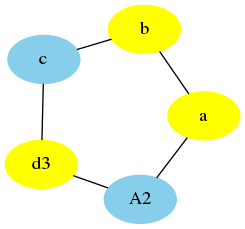

In [89]:
#display the results of the graph
display("image/png", read(filePNG))

In [ ]:
#
#AdjNN1
#str *= "{node [style=filled,color=yellow] a b   d3  } "
#str *= "{node [style=filled,color=skyblue] c A2  } "

strNN1=""
#init
strNN1 *= "strict digraph graphname { concentrate=true node [style=filled] "


#node color switch
strNN1 *= "{node [style=filled,color=yellow]" 
for ii in 1:size(AdjNN1)[1]
        strNN1 *= " N$(ii) "
  
end
strNN1 *= "} " #str *= "{node [style=filled,color=skyblue] c A2  } "

#edges
for ii in 1:size(AdjNN1)[1]
    for jj in 1:size(AdjNN1)[2]
        if(AdjNN1[ii,jj] == 1 )
            if(ii != jj)
                strNN1 *= " N$(ii) -> N$(jj) [dir=both];" #str *= " c -- d3 -- A2 -- a; "
            end
        end
    end
end
#tie off
strNN1 *= "}"
println(strNN1)

fileNameNN1 = "tmpFileNN1.dot"
filePNGNN1 = "tmpFileNN1.png"
writedlm( string("./",fileNameNN1), [strNN1] ,quotes=false)
run(`neato $fileNameNN1 -Tpng -o $filePNGNN1`)
display("image/png", read(filePNGNN1))